In [3]:
__nbid__ = '0014'
__author__ = 'Knut Olsen <knut.olsen@noirlab.edu>', 'David Herrera <david.herrera@noirlab.edu>', 'Astro Datalab Team <datalab@noirlab.edu'
__version__ = '20251205' # yyyymmdd
__datasets__ = ['phat_v2']
__keywords__ = ['M31', 'Healpix map', 'plot:cmd', 'lightcurve']

# Diversión con PHAT!

*Knut Olsen & el Equipo de Astro Data Lab*

#### (_Traducción de [M31WithPhat.ipynb](https://github.com/astro-datalab/notebooks-latest/blob/master/03_ScienceExamples/ExploringM31/M31WithPhat.ipynb)_)

## Tabla de contenidos
* [Objetivos y Resumen](#goals)
* [Avisos legales y atribuciones](#attribution)
* [Importaciones y configuración](#import)
* [Autenticación](#auth)
* [Información básica](#basic)
* [Examinar las columnas de la tabla de objetos PHAT](#columns)
* [Hacer un mapa de densidad de objetos](#density)
* [Hacer mapas de profundidad y color](#depth)
* [Hacer una consulta espacial y crear diagramas color-color y DCMs](#cmd)
* [Recuperar fotometría en series temporales de objetos seleccionados](#timeseries)
* [Recursos y referencias](#resources)

<a class="anchor" id="goals"></a>
# Objetivos
* Aprender cómo acceder a la fotometría promedio de PHAT y a las tablas de medidas de época única
* Aprender cómo usar una consulta SQL para hacer mapas Healpix de densidad de objetos, profundidad promedio, color promedio y número de brick de PHAT
* Aprender cómo recuperar y graficar datos de curvas de luz desde la tabla de medidas de época única de PHAT

# Resumen
El Panchromatic Hubble Andromeda Treasury (PHAT; PI Dalcanton) fue un programa Hubble Space Telescope multi-ciclo para mapear aproximadamente un tercio del disco formador de estrellas de M31, usando 6 filtros que cubren desde el ultravioleta hasta el infrarrojo cercano. 

El Data Lab aloja dos tablas principales de PHAT: la tabla de objetos versión 2 (phat_v2.phot_mod) y la tabla de medidas de época única versión 2 (phat_v2.phot_meas). La tabla de objetos contiene fotometría promedio en todos los filtros, con una fila por objeto. La tabla de medidas contiene todas las medidas fotométricas para todos los objetos, con una fila por medida. La tabla de medidas contiene ~7.5 mil millones de filas.

En este notebook, usaremos estas tablas para explorar el survey PHAT.

<a class="anchor" id="attribution"></a>
# Avisos Legales y atribuciones

Avisos Legales
-----------
Tome en cuenta que usar el Astro Data Lab constituye un acuerdo con nuestros [Avisos Legales](https://datalab.noirlab.edu/disclaimers.php) mínimos.

Reconocimientos
---------------
Si ud. usa el **Astro Data Lab** en sus publicaciones de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios de datos proveeidos por el Astro Data Lab, el cual es parte del Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) del NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc."(Asociación de Universidaddes para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

Si utiliza **SPARCL junto con la plataforma de Astro Data Lab** (por medio de JupyterLab, línea de comando o interfaz de la web) en su publicación de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios o datos proporcionados por el "SPectra Analysis and Retrievable Catalog Lab" (SPARCL) (Laboratorio de Análisis y Catálogo Recuperable de Espectros) y el Astro Data Lab, ambos pertenecientes al Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) de NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc." (Asociación de Universidades para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

En cualquiera de los casos, **por favor cite las siguientes publicaciones**:

* Publicación del concepto de Data Lab: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Descripción general del Astro Data Lab: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411.

Si hace referencia al Jupyterlab / Jupyter notebooks de Data Lab, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097.

Si publica en una revista de la AAS, agregue también la palabra clave `\facility{Astro Data Lab}`

Y si está usando SPARCL, por vor agregue también `\software{SPARCL}` y cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576.

La biblioteca de NOIRLab mantiene [listas de reconocimientos apropiados](https://noirlab.edu/science/about/scientific-acknowledgments) para usar cuando se hacen publicaciones utilizando los recursos, servicios o datos del Laboratorio.

---- **Versión en Inglés** ----

# Disclaimer & attribution

Disclaimers
-----------
Note that using the Astro Data Lab constitutes your agreement with our minimal [Disclaimers](https://datalab.noirlab.edu/disclaimers.php).

Acknowledgments
---------------
If you use **Astro Data Lab** in your published research, please include the text in your paper's Acknowledgments section:

_This research uses services or data provided by the Astro Data Lab, which is part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

If you use **SPARCL jointly with the Astro Data Lab platform** (via JupyterLab, command-line, or web interface) in your published research, please include this text below in your paper's Acknowledgments section:

_This research uses services or data provided by the SPectra Analysis and Retrievable Catalog Lab (SPARCL) and the Astro Data Lab, which are both part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

In either case **please cite the following papers**:

* Data Lab concept paper: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Astro Data Lab overview: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411

If you are referring to the Data Lab JupyterLab / Jupyter Notebooks, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097

If publishing in a AAS journal, also add the keyword: `\facility{Astro Data Lab}`

And if you are using SPARCL, please also add `\software{SPARCL}` and cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576

The NOIRLab Library maintains [lists of proper acknowledgments](https://noirlab.edu/science/about/scientific-acknowledgments) to use when publishing papers using the Lab's facilities, data, or services.

For this notebook specifically, please acknowledge:

* PHAT Reduction paper: Williams et al., "Reducing and Analyzing the PHAT Survey with the Cloud", ApJS, 2018, 236, 4: https://ui.adsabs.harvard.edu/abs/2018ApJS..236....4W

<a class="anchor" id="import"></a>
# Importaciones y configuración

In [2]:
import numpy as np
import pylab as plt
import matplotlib
import healpy as hp
from getpass import getpass

%matplotlib inline

# Importaciones de Datalab y relacionados
from dl import authClient as ac, queryClient as qc
from dl.helpers.utils import convert

<a class="anchor" id="auth"></a>
# Autenticación
Se puede acceder a gran parte de la funcionalidad de Data Lab sin iniciar sesión explícitamente (el servicio utiliza un inicio de sesión anónimo). Sin embargo, algunas funciones, como guardar los resultados de las consultas en el espacio de almacenamiento virtual, requieren iniciar sesión (es decir, necesitará una cuenta de usuario registrada).

Si necesita iniciar sesión en Data Lab, descomente la celda a continuación y ejecútela:

In [ ]:
#token = ac.login(input("Ingrese su nombre de usuario: (+ENTER) "),getpass("Ingrese su contraseña:: (+ENTER) "))
#ac.whoAmI()

<a class="anchor" id="basic"></a>
# Información básica
Primero, veamos las tablas disponibles en la base de datos PHAT, y luego obtengamos información básica desde la base de datos de estadísticas de Data Lab (<tt>tbl_stat</tt>) sobre la tabla principal de objetos PHAT, phat_v2.phot_mod. 

In [7]:
try:
    print(qc.schema('phat_v2',profile='default'))
except Exception as e:
    print(e.message)


Schema: phat_v2

      Table Name   Description
      ----------   -----------
       phot_meas   Individual photometric measurements, one row per measurement
        phot_mod   Combined average photometry
x1p5__phot_mod__allwise__source   phat_v2.phot_mod and allwise.source crossmatch (1.5 arcsec)
x1p5__phot_mod__gaia_dr3__gaia_source   xmatch_std.phat_v2__phot_mod and gaia_dr3.gaia_source cros
                   smatch (1.5 arcsec)
x1p5__phot_mod__unwise_dr1__object   phat_v2.phot_mod and unwise_dr1.object crossmatch (1.5 arcsec)



In [8]:
query = "SELECT * FROM tbl_stat WHERE schema='phat_v2' and tbl_name='phot_mod'" # Recuperar estadísticas útiles, rápidamente
try:
    info = qc.query(sql=query) # Por omisión el resultado es una cadena en formato CSV
except Exception as e:
    print(e.message)

In [8]:
print(info)

schema,tbl_name,nrows,ncols,nindex,table_size,indexes_size,total_size
phat_v2,phot_mod,118854912,93,50,105366577152,207955623936,313322201088



<a class="anchor" id="columns"></a>
# Examinar las columnas de la tabla de objetos PHAT
Primero, echaremos un vistazo a algunas filas de phat_v2.phot_mod, y obtendremos todas las columnas.

In [9]:
query = """SELECT *
           FROM phat_v2.phot_mod
           LIMIT 100
        """

In [10]:
try:
    result = qc.query(sql=query) # Por omisión el resultado es una cadena formateada CSV
except Exception as e:
    print(e.message)

### Convertir la salida a un Dataframe de Pandas
Los dataframes de Pandas son una forma conveniente de almacenar y trabajar con los datos. El módulo 'helpers' de Data Lab (<a href="http://datalab.noirlab.edu/docs/manual/UsingAstroDataLab/ClientInterfaces/Helpers/Helpers.html">docs</a>) tiene un método de conversión, con muchos formatos de salida posibles.

In [11]:
df1 = convert(result,'pandas')
print("Número de filas:", len(df1))
print(df1.columns) # Imprimir encabezados de columna
print(len(df1.columns))

Número de filas: 100
Index(['ra', 'dec', 'elon', 'elat', 'glon', 'glat', 'field', 'brick', 'x', 'y',
       'f110w_rate', 'f110w_raterr', 'f110w_vega', 'f110w_err', 'f110w_chi',
       'f110w_snr', 'f110w_sharp', 'f110w_round', 'f110w_crowd', 'f160w_rate',
       'f160w_raterr', 'f160w_vega', 'f160w_err', 'f160w_chi', 'f160w_snr',
       'f160w_sharp', 'f160w_round', 'f160w_crowd', 'f275w_rate',
       'f275w_raterr', 'f275w_vega', 'f275w_err', 'f275w_chi', 'f275w_snr',
       'f275w_sharp', 'f275w_round', 'f275w_crowd', 'f336w_rate',
       'f336w_raterr', 'f336w_vega', 'f336w_err', 'f336w_chi', 'f336w_snr',
       'f336w_sharp', 'f336w_round', 'f336w_crowd', 'f475w_rate',
       'f475w_raterr', 'f475w_vega', 'f475w_err', 'f475w_chi', 'f475w_snr',
       'f475w_sharp', 'f475w_round', 'f475w_crowd', 'f814w_rate',
       'f814w_raterr', 'f814w_vega', 'f814w_err', 'f814w_chi', 'f814w_snr',
       'f814w_sharp', 'f814w_round', 'f814w_crowd', 'ir_x', 'ir_y',
       'f814w_f475w', 'f475w_f3

<a class="anchor" id="density"></a>
# Hacer un mapa de densidad de objetos
Una de las columnas en la tabla de objetos PHAT, nest4096, es el índice Healpix (NSIDE=4096, esquema nested) para la AR y Dec de los objetos. Healpix es una teselación práctica del cielo en teselas de igual área. El módulo Python healpy tiene todas las funciones relacionadas con Healpix.

Para hacer mapas de cantidades agregadas en PHAT, vamos a usar la base de datos para devolver resultados en una consulta agrupada por valor de índice Healpix. Luego podemos colocar los resultados en arrays y usar la funcionalidad de healpy para mostrar los mapas.

En esta primera consulta, la cláusula GROUP BY le indica a la base de datos que agregue los resultados por los valores en la columna nest4096, y devuelva la AR y Dec promedio de los objetos en esos grupos, así como el valor nest4096 en sí y el conteo del número de objetos en el grupo.

In [9]:
query = """SELECT avg(ra) as ra0,avg(dec) as dec0,nest4096,count(nest4096) as nb
           FROM phat_v2.phot_mod
           GROUP BY nest4096
        """

In [10]:
try:
    result = qc.query(sql=query) # Por omisión el resultado es una cadena formateada CSV
except Exception as e:
    print(e.message)

### Convertir la salida a un Dataframe de Pandas
Una vez más usaremos helpers para convertir el resultado a un dataframe de Pandas. Nuestro dataframe tiene una fila por Healpix. Comprobaremos que la suma del número de objetos en todos los Healpixels es igual al número de filas en la tabla.

In [11]:
df_density = convert(result,'pandas')
print("Número de filas:", len(df_density))
print(np.sum(df_density['nb'])) # Imprimir totales

Número de filas: 2574
118854914


### Crear el mapa Healpix
Un mapa Healpix es simplemente un arreglo unidimensional con número de elementos definido por el parámetro NSIDE, que indica cuántas veces se dividen los Healpixels base. Podemos visualizarlo como un mapa usando la librería <tt>healpy</tt>.

In [12]:
hmap = np.zeros(hp.nside2npix(4096))

In [16]:
print(df_density.head())

         ra0       dec0  nest4096     nb
0  10.987294  41.109718  10746303   3843
1  11.052648  41.087117  10746315    462
2  11.059957  41.092093  10746318  11578
3  11.069437  41.104929  10746319   6987
4  11.077243  41.115676  10746330   1383


### Poblar el mapa Healpix
Ahora asignamos a los elementos de nuestro mapa Healpix el número de objetos devueltos por la consulta, calculamos el centro de la distribución de AR y Dec de los objetos, y usamos gnomview de healpy para visualizar la salida. ¿Notas algo curioso? La tabla de objetos PHAT tiene objetos duplicados entre algunos de los bloques (bloques 11, 12, 13 y 14).

In [13]:
hmap[df_density['nest4096']]=df_density['nb']
(rarot,decrot)=(np.median(df_density['ra0']),np.median(df_density['dec0']))

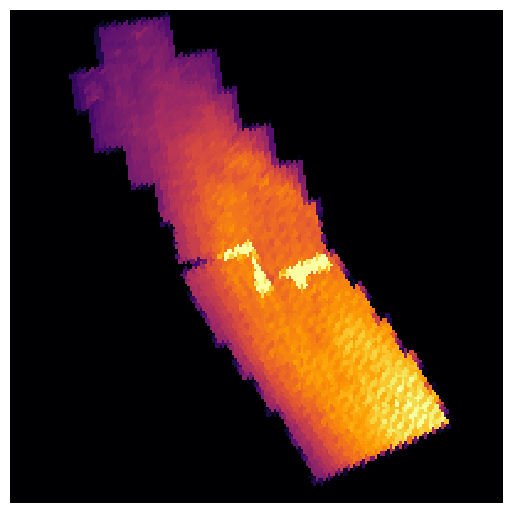

In [14]:
hp.gnomview(hmap,title='',notext=True,cbar=False,reso=0.4,nest=True,rot=(rarot,decrot,0),cmap='inferno',min=1e3,max=8e4)

<a class="anchor" id="depth"></a>
# Hacer mapas de profundidad y color
Ahora haremos nuestros mapas un poco más sofisticados. Haremos que la base de datos devuelva magnitudes promedio en banda WFC3 u y ACS y colores, y los números de brick PHAT, y aplicaremos algunos cortes sobre las magnitudes y flags de los objetos. Nuevamente usamos GROUP BY sobre la columna nest4096.

In [15]:
query = """SELECT avg(ra) as ra0,avg(dec) as dec0,nest4096,count(nest4096) as nb,
            avg(f475w_vega) as gmag,avg(f814w_vega) as imag,avg(brick) as brick,
            avg(f475w_vega-f814w_vega) as g_i
           FROM phat_v2.phot_mod
           WHERE f475w_gst=1 AND f814w_gst=1 AND f475w_vega<50 AND f814w_vega<50
           GROUP BY nest4096
          """
print(query)

SELECT avg(ra) as ra0,avg(dec) as dec0,nest4096,count(nest4096) as nb,
            avg(f475w_vega) as gmag,avg(f814w_vega) as imag,avg(brick) as brick,
            avg(f475w_vega-f814w_vega) as g_i
           FROM phat_v2.phot_mod
           WHERE f475w_gst=1 AND f814w_gst=1 AND f475w_vega<50 AND f814w_vega<50
           GROUP BY nest4096
          


In [16]:
try:
    result = qc.query(sql=query) # Por omisión el resultado es una cadena formateada CSV
except Exception as e:
    print(e.message)

In [17]:
df_all = convert(result,'pandas')
print("Número de filas:", len(df_all))
print(np.sum(df_all['nb'])) # Imprimir cuentas totales

Número de filas: 2574
82741245


In [22]:
print(df_all.head())

         ra0       dec0  nest4096    nb       gmag       imag  brick       g_i
0  10.987299  41.109672  10746303  2509  26.833515  25.427985    2.0  1.405530
1  11.052603  41.087098  10746315   205  26.658239  25.286244    2.0  1.371995
2  11.060168  41.092374  10746318  5514  26.775284  25.348753    2.0  1.426531
3  11.069515  41.105006  10746319  3633  26.919639  25.499834    2.0  1.419805
4  11.077266  41.115689  10746330   785  27.006906  25.637276    2.0  1.369629


### Mapa Healpix de la magnitud promedio F475W
El mapa de la magnitud promedio F475W da una buena idea de cómo varía la profundidad del catálogo PHAT con la posición en M31. La profundidad es mucho menos profunda en el Bulbo, el cual está muy congestionado, que en el disco externo.

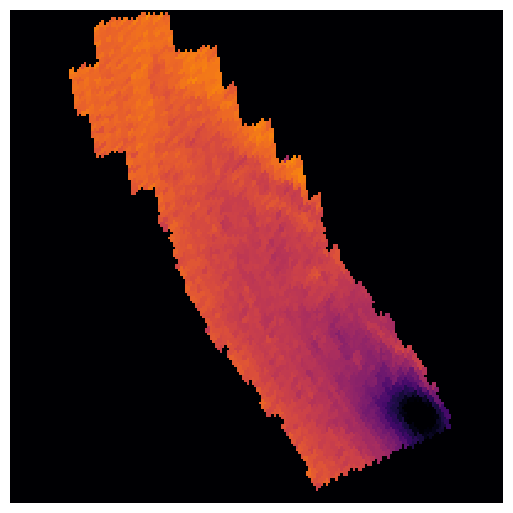

In [18]:
gmap = np.zeros(hp.nside2npix(4096))
gmap[df_all['nest4096']] = df_all['gmag']
hp.gnomview(gmap,title='',notext=True,cbar=False,reso=0.4,nest=True,rot=(rarot,decrot,0),cmap='inferno',min=25,max=28)

### Mapa Healpix del color promedio F475W-F814W
El mapa del color promedio revela tanto diferencias poblacionales como los carriles de polvo en la galaxia, así como el anillo de 10 kpc.

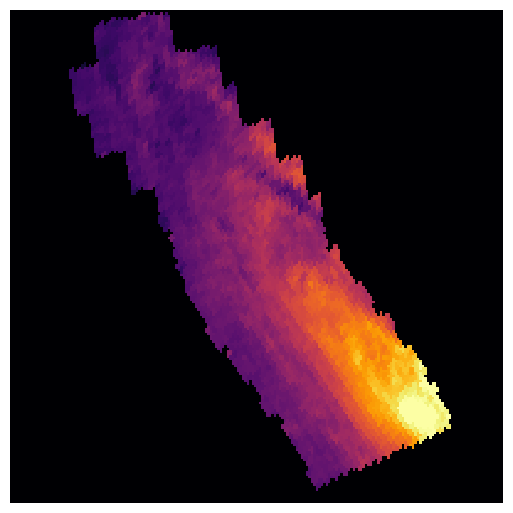

In [19]:
gimap = np.zeros(hp.nside2npix(4096))
gimap[df_all['nest4096']] = df_all['g_i']
hp.gnomview(gimap,title='',notext=True,cbar=False,reso=0.4,nest=True,rot=(rarot,decrot,0),cmap='inferno',min=1,max=2.5)

### Mapa Healpix del número de bloque
También podemos usar nuestra tabla de Healpix para hacer un mapa de los bloques de PHAT.

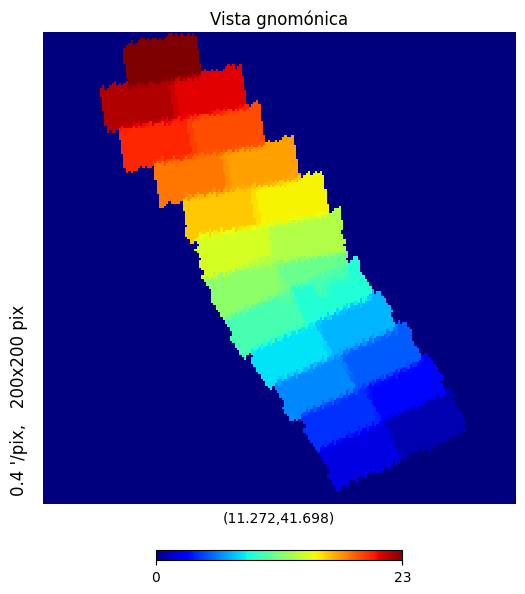

In [20]:
brickmap = np.zeros(hp.nside2npix(4096))
brickmap[df_all['nest4096']] = df_all['brick']
hp.gnomview(brickmap,title='Vista gnomónica',reso=0.4,nest=True,rot=(rarot,decrot,0),cmap='jet',min=0,max=23)

<a class="anchor" id="cmd"></a>
# Hacer una consulta espacial y crear diagramas color-color y DCMs
Ahora hagamos una búsqueda cónica de objetos dentro de un radio alrededor de una posición particular. Las tablas PHAT están indexadas espacialmente para hacer estas consultas rápidas. Buscaremos dentro de un radio de 1 minuto de arco de la posición AR y Dec que definimos anteriormente.

In [26]:
query = """SELECT *
           FROM phat_v2.phot_mod WHERE q3c_radial_query(ra,dec,{0},{1},{2})
        """.format(rarot,decrot,1./60)
print(query)

SELECT *
           FROM phat_v2.phot_mod WHERE q3c_radial_query(ra,dec,11.271881856868337,41.697843056097554,0.016666666666666666)
        


In [27]:
try:
    result = qc.query(sql=query) # Por omisión el resultado es una cadena formateada CSV
except Exception as e:
    print(e.message)

### Eliminar valores faltantes o erróneos
Algunos de los objetos devueltos tendrán mediciones de magnitud faltantes, indicadas por 99. Eliminemos esos registros y además seleccionemos solo las estrellas "buenas" en las bandas ACS.

In [28]:
df = convert(result,'pandas')
print("Número de filas:", len(df))
df_cmd = df[(df['f336w_vega']<50) & (df['f475w_vega']<50) & (df['f814w_vega']<50) & \
          (df['f475w_gst']==1) & (df['f814w_gst']==1)]
print("Número de filas:", len(df_cmd))


Número de filas: 281968
Número de filas: 118174


### Hacer diagramas color-color y DCMs
Mostraremos el diagrama color-color F475W-F814W, F336W-F475W, y un Diagrama Color-Magnitud (DCM). ¿Qué observas?

(28.4, 22.0)

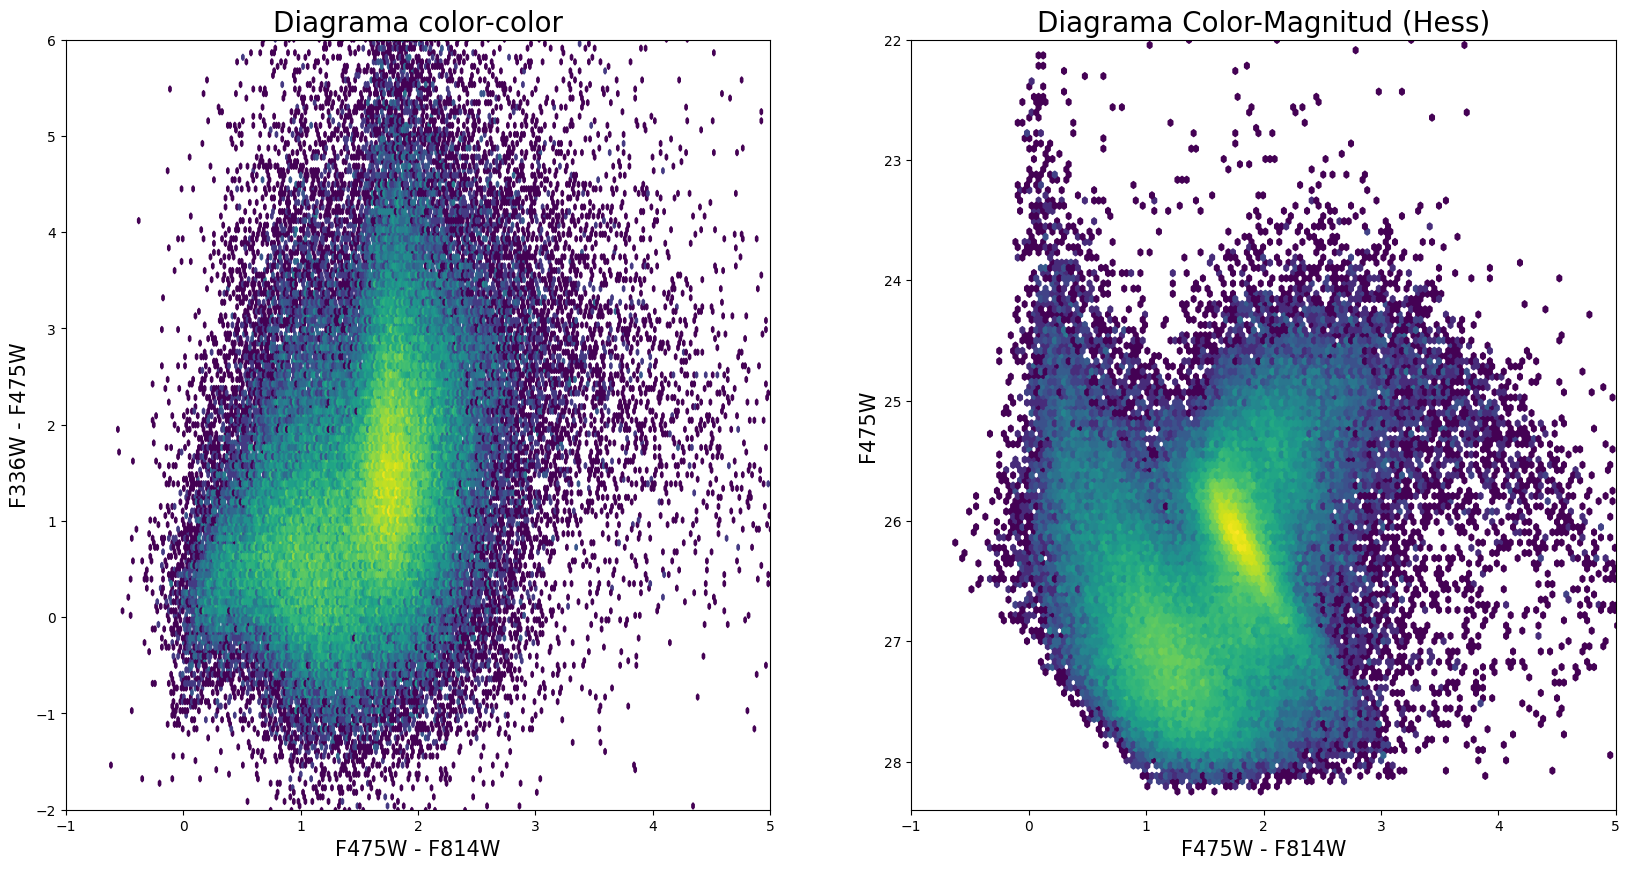

In [29]:
# Crear una figura
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Diagrama color-color
im = ax1.hexbin(df_cmd['f475w_vega']-df_cmd['f814w_vega'],df_cmd['f336w_vega']-df_cmd['f475w_vega'], \
                gridsize=400,cmap=matplotlib.cm.viridis,norm=matplotlib.colors.LogNorm())
ax1.set_ylabel('F336W - F475W',fontsize=15)
ax1.set_xlabel('F475W - F814W',fontsize=15)
ax1.set_title('Diagrama color-color',fontsize=20)
ax1.set_ylim(-2,6)
ax1.set_xlim(-1,5)


# Diagrama Color-Magnitud (diagrama de Hess)
im2 = ax2.hexbin(df_cmd['f475w_vega']-df_cmd['f814w_vega'],df_cmd['f475w_vega'], \
                 gridsize=200,cmap=matplotlib.cm.viridis,norm=matplotlib.colors.LogNorm())
ax2.set_xlabel('F475W - F814W',fontsize=15)
ax2.set_ylabel('F475W',fontsize=15)
ax2.set_title('Diagrama Color-Magnitud (Hess)',fontsize=20)
ax2.set_xlim(-1,5)
ax2.set_ylim(28.4,22)

<a class="anchor" id="timeseries"></a>
# Recuperación de fotometría en series temporales de objetos seleccionados
En esta parte del notebook, elegiremos una variable Céfida y luego consultaremos la tabla completa de medidas para la fotometría en series temporales. Definiremos un par de funciones para recuperar datos y producir una gráfica.

In [30]:
# Definir una función para seleccionar solo medidas en una banda
def get_data(df,band='F475W'):
    sel = (df['filter'] == band) & (df['magvega'] < 90)    
    t = df['mjd'][sel].values
    y = df['magvega'][sel].values
    dy = df['magerr'][sel].values
    return t,y,dy # Devolver tiempo, magnitudes en una banda, incertidumbres

In [39]:
# Función reutilizable para graficar la curva de luz
def plot_raw_lightcurve(t,y,dy,title='',ax=None,lperc=13,rperc=99,color='g',ms=8):
    
    if ax is None:
        fig, ax = plt.subplots()
    
    jd0 = t.min() # Desplazamiento de la fecha Julian modificada
    t = t-jd0 # Primera fecha de observaciones = 0

    ax.errorbar(t,y,yerr=dy,marker='.',ms=ms,ls='none',color=color,lw=1,alpha=0.5,label='')

    # Tareas principales del panel
    ax.set_xlabel('Fecha Juliana modificada - %g (días)' % jd0, fontsize=20)
    ax.set_ylabel('Magnitud',fontsize=20)
    ax.tick_params(labelsize=20)
    ax.invert_yaxis()
    ax.set_title(title)

In [32]:
def get_folded_phase(t,best_period):
    
    """Plegar los tiempos de observación con el mejor periodo de la señal variable."""
    
    # Curva de luz sobre el periodo, tomar el resto (es decir, la "fase" de un periodo)
    phase = (t / best_period) % 1
    
    return phase

In [33]:
def plot_folded_lightcurve(t,y,best_period,dy=None,ax=None,color='g',ms=10):
    
    """Graficar la curva de luz plegada.
    
    Parámetros
    ----------
    
    t, y : array
        Arreglos 1-D de tiempo y magnitud
        
    best_period : float
        Periodo verdadero de la señal.
        
    dy : array o None
        Si es un arreglo, los valores son las incertidumbres en ``y``, y la gráfica mostrará barras de error.
        Si es None, la gráfica no tendrá barras de error.
        
    ax : instancia o None
        Si es una instancia de la clase axis, se graficará en ese objeto. Si es None, se generará una nueva figura y objeto axis.
    """

    phase = get_folded_phase(t,best_period)
    
    if ax is None:
        fig, ax = plt.subplots()
        
    marker = '.'
    lw = 1
    alpha = 0.6
    
    
    if dy is not None:
        ax.errorbar(phase,y,yerr=dy,marker=marker,ms=ms,ls='none',lw=lw,color=color,alpha=alpha)
    else:
        ax.plot(phase,y,marker=marker,ms=ms,ls='none',lw=lw,color=color,alpha=alpha)
            
    ax.invert_yaxis()
    ax.tick_params(labelsize=20)
    ax.set_xlabel('Fase (días)', fontsize=20)
    ax.set_ylabel('Magnitud',fontsize=20);

In [34]:
# Elegir una estrella de Wagner-Kaiser et al. (2015)
rawk = 11.02203
decwk = 41.23451
best_period = 10.29 # días
query = """SELECT * FROM phat_v2.phot_meas WHERE q3c_radial_query(ra,dec,{0},{1},{2})""".format(rawk,decwk,0.2/3600)
print(query)

SELECT * FROM phat_v2.phot_meas WHERE q3c_radial_query(ra,dec,11.02203,41.23451,5.555555555555556e-05)


In [35]:
try:
    result = qc.query(sql=query) # Por omisión el resultado es una cadena formateada CSV
except Exception as e:
    print(e.message)

In [36]:
df_ts = convert(result,'pandas')
print("Número de filas:", len(df_ts))
print(df_ts['filter'].unique())
print(df_ts['objid'].unique())


Número de filas: 62
['F336W' 'F814W' 'F475W' 'F275W' 'F160W' 'F110W']
['PHAT_11.0220304+41.234515']


In [37]:
uid=df_ts['objid'].unique()
df_ts=df_ts[(df_ts['objid']==uid[0])]

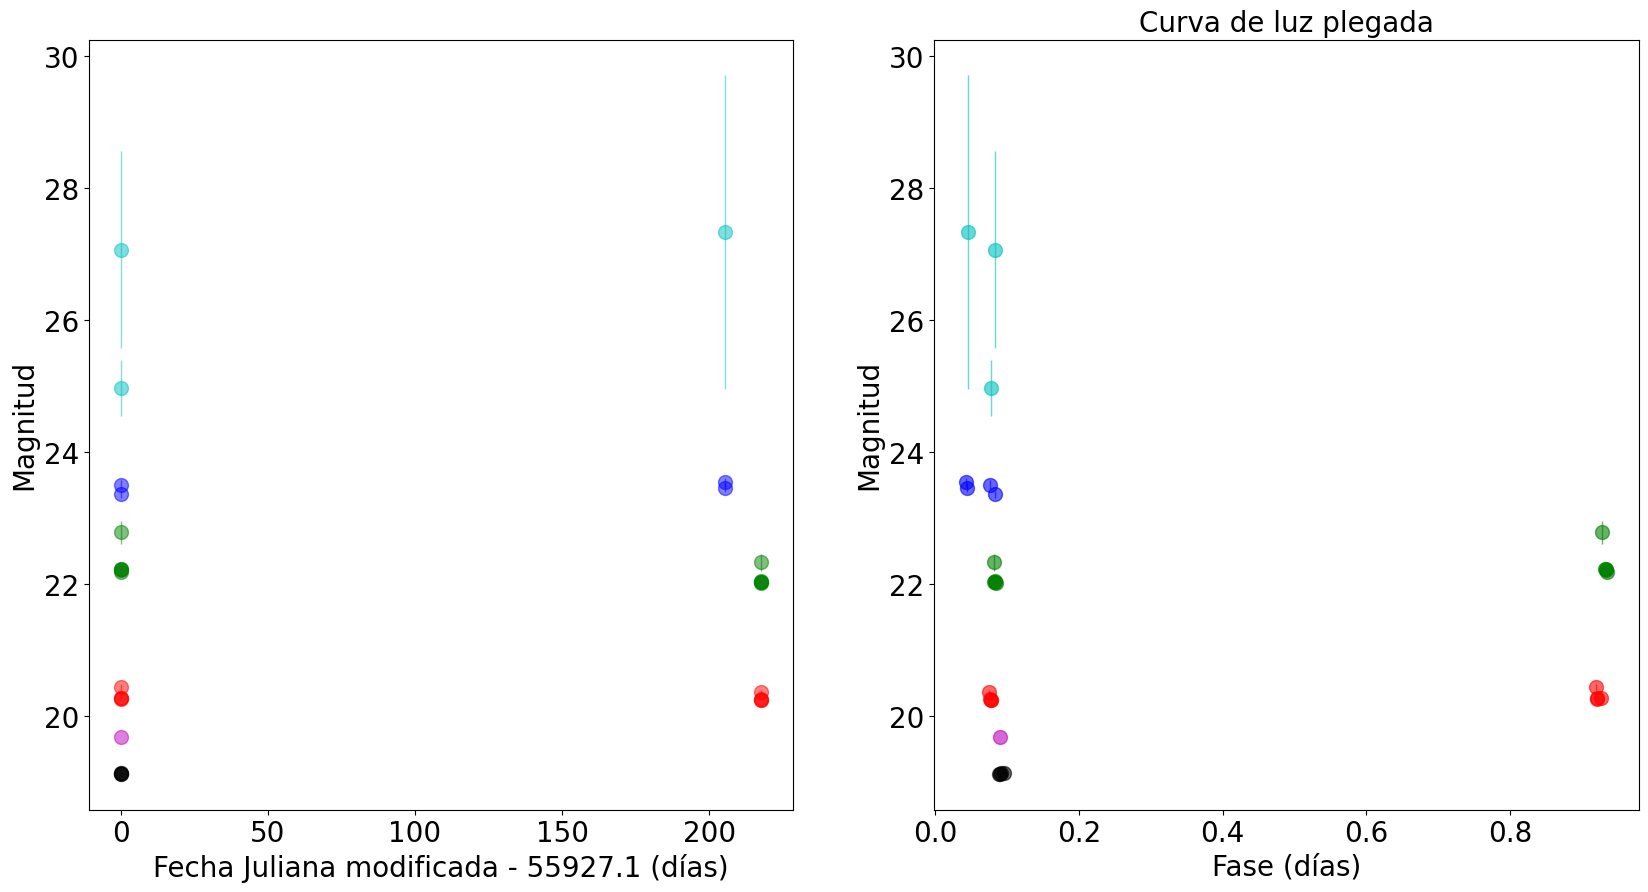

In [40]:
colors = list('gcbrkm')
filters = ['F475W','F275W','F336W','F814W','F160W','F110W']
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
ax2.set_title('Curva de luz plegada',fontsize=20)
for j in range(len(colors)):
   c = colors[j]
   t,y,dy = get_data(df_ts,filters[j])
   plot_raw_lightcurve(t,y,dy,title='',ax=ax1,color=c,ms=20)
   plot_folded_lightcurve(t,y,best_period,dy=dy,ax=ax2,color=c,ms=20)


<a class="anchor" id="resources"></a>
# Recursos y referencias
Dalcanton, J.J. et al. (2012, ApJS, 200, 18), "The Panchromatic Hubble Andromeda Treasury"
http://adsabs.harvard.edu/abs/2012ApJS..200...18D

Wagner-Kaiser, R. et al. (2015, MNRAS, 451, 724), "Panchromatic Hubble Andromeda Treasury XIII: The Cepheid period-luminosity relation in M31"
http://adsabs.harvard.edu/abs/2015MNRAS.451..724W

Williams, B.F. et al. (2014, ApJS, 215, 9), "The Panchromatic Hubble Andromeda Treasury. X. Ultraviolet to Infrared Photometry of 117 Million Equidistant Stars"
http://adsabs.harvard.edu/abs/2014ApJS..215....9W

Williams, B.F. et al., "Reducing and Analyzing the PHAT Survey with the Cloud", ApJS, 236, 4 https://ui.adsabs.harvard.edu/abs/2018ApJS..236....4W
